# Scicrop <br />
### Processo seletivo para Estágio em Data Science <br />

Glauco Endrigo Moura de Lima

Email: glauco.endrigo@hotmail.com

Data: 05/08/2020  

* [Link do desafio:](https://github.com/Scicrop/jobs-datascience)

#### Objetivo:

São fornecidos dados baseados em culturas colhidas por vários agricultores no final da safra de 2018-2019. Para simplificar o problema, todos os fatores relacionados às técnicas agrícolas e climáticas, não influenciaram esses resultados.
O objetivo é  determinar o resultado desta safra atual de 2020, ou seja, se a colheita será saudável, prejudicada por pesticidas, ou prejudicada por outros motivos.


#### Descrição da base de dados:
| Variável                 | Descrição                                                    |
| ------------------------ | ------------------------------------------------------------ |
| Identificador_Agricultor | IDENTIFICADOR DO CLIENTE                                     |
| Estimativa_de_Insetos    | Estimativa de insetos por M²                                 |
| Tipo_de_Cultivo          | Classificação do tipo de cultivo (0,1)                       |
| Tipo_de_Solo             | Classificação do tipo de solo (0,1)                          |
| Categoria_Pesticida      | Informação do uso de pesticidas (1- Nunca Usou, 2-Já Usou, 3-Esta usando) |
| Doses_Semana             | Número de doses por semana                                   |
| Semanas_Utilizando       | Número de semanas Utilizada                                  |
| Semanas_Sem_Uso          | Número de semanas sem utilizar                               |
| Temporada                | Temporada Climática (1,2,3)                                  |
| dano_na_plantacao        | Variável de Predição - Dano no Cultivo (0=Sem Danos, 1=Danos causados por outros motivos, 2=Danos gerados pelos pesticidas) |

SciCrop®
#### Descrição dos arquivos: 

* Safra_2018-2019.csv - Dados do final da safra de 2018-2019.
* Safra_2020.csv    -    Dados da safra de 2020.

#### Observação: 
Para simplificar o problema,  pode-se assumir que todos os fatores relacionados as técnicas agrícolas e climáticas, não influenciaram esses resultados. Porém essas técnicas não parecem se referir  aos dados na base de dados recebida.Então a princípio não usaremos essa simplificação na base de dados.


#### Bibliotecas úteis: 

* [seaborn](https://seaborn.pydata.org/)
* [pandas](http://pandas.pydata.org/)
* [matplotlib](https://matplotlib.org/)
* [numpy](https://numpy.org/)
* [sklearn](https://scikit-learn.org/stable/)

In [76]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split #  Para uso do K Nearest Neighbors.
from sklearn import neighbors                        #  Para uso do K Nearest Neighbors.

#### Passo 1: Ler os arquivos CSV no formato de  Pandas DataFrame

In [77]:
train = pd.read_csv("Safra_2018-2019.csv",index_col=0)
test = pd.read_csv("Safra_2020.csv", index_col=0)

print (train.head(3))
print (80*'-')
print (test.head(3))

  Identificador_Agricultor  Estimativa_de_Insetos  Tipo_de_Cultivo  \
0               SCROP00001                    188                1   
1               SCROP00002                    209                1   
2               SCROP00003                    257                1   

   Tipo_de_Solo  Categoria_Pesticida  Doses_Semana  Semanas_Utilizando  \
0             0                    1             0                 0.0   
1             0                    1             0                 0.0   
2             0                    1             0                 0.0   

   Semanas_Sem_Uso  Temporada  dano_na_plantacao  
0                0          1                  0  
1                0          2                  1  
2                0          2                  1  
--------------------------------------------------------------------------------
      Identificador_Agricultor  Estimativa_de_Insetos  Tipo_de_Cultivo  \
80000               SCROP80001                    256          

#### Passo 2: Análise exploratória de dados (AED) 


   * Obter  uma visão geral dos dados

   * Concentrar-se em descrever nossa amostra - os dados reais que observamos - em vez de fazer inferência sobre uma população maior ou predição sobre dados futuros a serem coletados.

   * Identificar  casos incomuns e extremos (discrepâncias, informações em quartis, etc.)

   * Identificar os erros óbvios em nossos dados que, de outra forma, poderíamos ter perdido.

   * Ter um amplo ponto de vista dos dados e saber como  proceder com os próximos para a solução.
   

###### Passo 2.1:  Começamos com uma distribuição de dano_na_plantação.


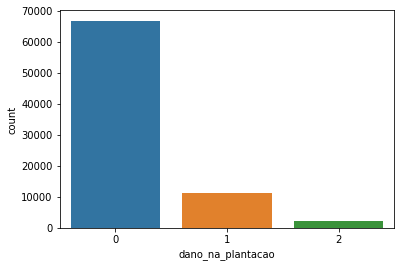

In [78]:
sns.countplot(train['dano_na_plantacao'])

O gráfico nos mostra que a maior parte dos dados são 0(Sem Danos).Em outras palavras os dados estão bem desbalanceados. Provavelmente os resultados da safra de 2020 serão em sua maior parte 0(Sem Danos).

######  Passo 2.2 : Agora que sabemos a distribuição de dano_na_plantação , vamos descobrir a distribuição das variáveis:

Distribuição dos valores das colunas


C:\Users\Paulo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Paulo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


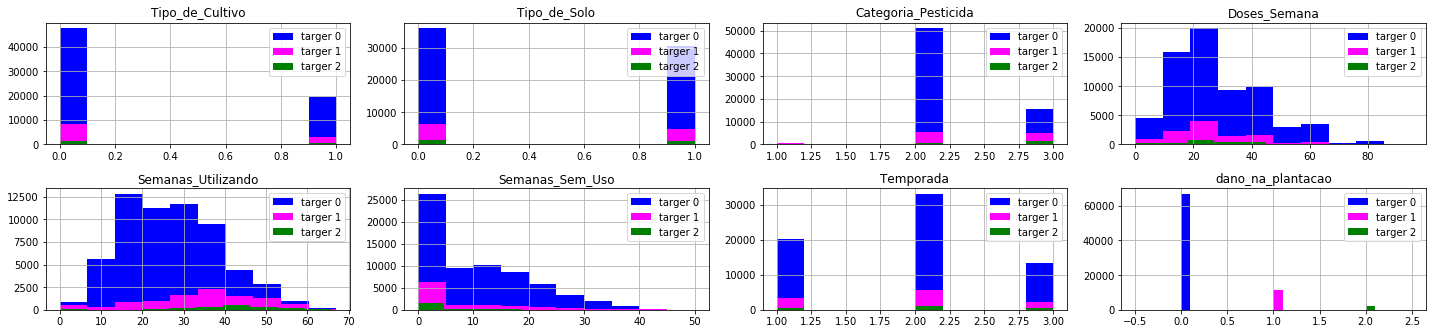

In [79]:
t0 =train[train['dano_na_plantacao']==0]
t1 =train[train['dano_na_plantacao']==1]
t2 =train[train['dano_na_plantacao']==2]

print('Distribuição dos valores das colunas')
plt.figure(figsize=(20,16))
for i, col in enumerate(list(train.columns)[2:30]):
    plt.subplot(7,4,i+1)
    plt.hist(t0[col],label='targer 0', color = 'blue')
    plt.hist(t1[col],label='targer 1', color = 'magenta')
    plt.hist(t2[col],label='targer 2', color = 'g')
    
    plt.title (col)
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

Agora podemos ver em quais campos a distribuição é gaussiana e em quais não é. Os campos "Doses_Semana"  e "Semanas_Utilizando" apresentam distribuições razoavelmente simétricas.
Porém, os campos "Semana_Utilizando"  e  "Semanas_Sem_Uso", que supostamente estariam relacionados, apresentam distribuições diferentes quando  analisamos o DataFrame train("Safra_2018-2019.csv").Essas duas colunas normalmente  teriam relação de dependência, e não é o que os dados mostram.No passo 3 aplicaremos a função .drop(['Semanas_Sem_Uso'],axis=1). Caso a dependência fosse confirmada, também seria aplicada a função drop() para evitar redundância no modelo de machine learning.

###### Passo 2.3:  Agora vamos descobrir as estatísticas básicas dos dados.

In [80]:
train.describe()

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,71945.000000,80000.000000,80000.000000,80000.000000
mean,1400.020875,0.283338,0.455550,2.267587,25.846750,28.664480,9.549088,1.897575,0.192312
std,849.792471,0.450622,0.498023,0.463748,15.557246,12.424751,9.905547,0.702079,0.455912
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [81]:
test.describe()

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
count,8858.000000,8858.000000,8858.000000,8858.000000,8858.000000,7913.000000,8858.000000,8858.000000
mean,1389.902574,0.293746,0.484308,2.233461,25.878867,28.255655,9.959359,1.891398
std,842.295394,0.455503,0.499782,0.442366,15.529796,12.083474,9.848986,0.694461
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,27.000000,8.000000,2.000000
75%,1898.000000,1.000000,1.000000,2.000000,40.000000,37.000000,16.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


Observações :


* As colunas Tipo_de_Cultivo, Tipo_de_Solo, 	Categoria_Pesticida e Temporada tem os menores desvios padrões  devido a forma coomo são classificados. 
* Os valores  Min, max, mean, sdt  das duas tabelas train e test data são bem parecidos, exceto pela coluna que por enquanto eu não sei o que essa coluna significa.

###### Passo 2.4: Verificando os valores faltantes

In [82]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total,percent], axis=1, keys = ['Total', 'Percent'])
    types =[]
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [83]:
missing_data(train) 

,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
Total,0,0,0,0,0,0,8055,0,0,0
Percent,0,0,0,0,0,0,10.0687,0,0,0
Types,object,int64,int64,int64,int64,int64,float64,int64,int64,int64


In [84]:
missing_data(test) 

,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
Total,0,0,0,0,0,0,945,0,0
Percent,0,0,0,0,0,0,10.6683,0,0
Types,object,int64,int64,int64,int64,int64,float64,int64,int64


Pode-se observar que apenas existe valores faltando na coluna " Semanas_Utilizando ".

###### Passo 2.5: Valores duplicados 
Um problema bem frequente que ocorre quando aplicamos machine learning é  valore duplicado, vamos verificar se nosso dataframe tem valores duplicados.

In [85]:
features = train.columns.values[0:9]
unique_max_train = []
unique_max_test = []
for feature in features:
    values = train[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])
    values = test[feature].value_counts()
    unique_max_test.append([feature, values.max(), values.idxmax()])
    
var1 = np.transpose(pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value']).sort_values(by='Max duplicates', ascending=False))
var1.head(10) 

,2,4,3,8,7,5,6,1,0
Feature,Tipo_de_Cultivo,Categoria_Pesticida,Tipo_de_Solo,Temporada,Semanas_Sem_Uso,Doses_Semana,Semanas_Utilizando,Estimativa_de_Insetos,Identificador_Agricultor
Max duplicates,57333,57067,43556,39728,24833,20344,3489,3081,1
Value,0,2,0,2,0,20,20,1212,SCROP04497


In [86]:
var2 = np.transpose(pd.DataFrame(unique_max_test, columns=['Feature', 'Max duplicates', 'Value']).sort_values(by='Max duplicates', ascending=False))
var2.head(10) 

,4,2,3,8,7,5,6,1,0
Feature,Categoria_Pesticida,Tipo_de_Cultivo,Tipo_de_Solo,Temporada,Semanas_Sem_Uso,Doses_Semana,Semanas_Utilizando,Estimativa_de_Insetos,Identificador_Agricultor
Max duplicates,6642,6256,4568,4482,2441,2245,389,357,1
Value,2,0,0,2,0,20,20,1212,SCROP84042


Para essa análise de dados duplicados, a princípio  as colunas que nos interessam são: 

* Estimativa_de_Insetos
* Semanas_Sem_Uso	
* Doses_Semana
* Semanas_Utilizando

Analisando os dados desses campos listados acima, os números duplicados das respectivas colunas são iguais nos 2 dataframes.
Esse é um padrão interessante que talvez possamos utilizar no futuro.

###### Passo 3: Trabalhando os dados
Vamos  pré-processar os dados  para uso em   algoritmo de machine learning. Retiraremos os atributos não  preditivos do dataset. Deixaremos as features que podem gerar  melhor acurácia no modelo de machine learning. A qualidade das features influencia muito a qualidade dos resultados.


In [87]:
train.dropna(inplace=True)                                   # Como foi mostrado no passo 2.4, apenas 10% das linhas contém NAN
train.drop(['Semanas_Sem_Uso'],axis=1,inplace=True)          # Como foi concluído no passo 2.2, podemos tirar essa coluna 
y=train['dano_na_plantacao']                                 # Salvando a coluna Target
train.drop(['dano_na_plantacao'],axis=1,inplace=True)        # Preparando os dados para o modelo de Machine Learning
train.drop(['Identificador_Agricultor'],axis=1,inplace=True) # Esse indentificador funciona como um id, podemos tirar essa coluna.

test.dropna(inplace=True)                                    # Preparando os dados de test para usar no modelo de ML
test.drop(['Semanas_Sem_Uso'],axis=1,inplace=True)           # Preparando ...                                         
test.drop(['Identificador_Agricultor'],axis=1,inplace=True)  # Preparando ...

###### Passo 4: Solução 
Pelas característica do problema, vemos que é um problema para Aprendizagem de Máquina Supervisionada.
Devido a natureza dos dados e o fato da variável de predição" ser discreta, na forma: Dano no Cultivo (0=Sem Danos, 1=Danos causados por outros motivos, 2=Danos gerados pelos pesticidas). Esse problema pode ser considerado como de classificação. 

Dois ótimos modelos de classificação que eu já tenho familiaridade são :  

* K Nearest Neighbors
    *  É automaticamente não linear, pode detectar dados distribuídos lineares ou não lineares, tende a ter um desempenho muito bom com muitos pontos de dados.

    * Precisa ser cuidadosamente ajustado, a escolha de K e a métrica (distância) a ser usada são críticas.  para muitos pontos de dados, o KNN tem problemas de desempenho. 

    * É muito sensível a recursos ruins (atributos), portanto a seleção de recursos também é importante. O KNN também é sensível a valores discrepantes e a remoção deles antes de usá-lo tende a melhorar os resultados.
    
* Support Vector Machine

    * O SVM pode ser usado de maneiras lineares ou não lineares com o uso de um Kernel, quando se tem um conjunto limitado de pontos em muitas dimensões, o SVM tende a ser muito bom porque deve ser capaz de encontrar a separação linear que possivelmente  existe. 
    * É bom para outliers, pois usará apenas os pontos mais relevantes para encontrar uma separação linear (vetores de suporte)

    * Precisa ser ajustado, o custo "C" e o uso de um kernel e  hiperparâmetros são  críticos para o algoritmo. 

Um resumo básico: 

-  Muitos pontos em um espaço de baixa dimensão, o KNN provavelmente é uma boa escolha.

-  Alguns pontos em um espaço dimensional alto, provavelmente um SVM linear é melhor.

Como na base de dados os espaços dimensionais tem bastante pontos, isso significa que a melhor opção será usar K Nearest Neighbors.Usando o Support Vector Machine demoraria muito para o programa rodar na máquina que estou usando.



###### Solução usando uma abordagem simplificada de  K Nearest Neighbors

A idéia básica de K Nearest Neighbors é classificar com base na proximidade

In [97]:
X = np.array(train) # features 
y = np.array(y)     # label 

clf =  neighbors.KNeighborsClassifier(n_neighbors=8)

acuracias = []
for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2) 
        clf.fit(X_train,y_train)
        acuracia  = clf.score(X_test,y_test) 
        #print("Acurácia:",acuracia)
        acuracias.append(acuracia)
        
print("Acurácia:",sum(acuracias)/len(acuracias))
prediction = clf.predict(test)

Acurácia: 0.8351240530961149


In [89]:
prediction = pd.DataFrame(prediction)
prediction = prediction.rename(columns={0:'dano_na_plantacao'})
prediction.to_csv("./resultado.csv", sep=',',index=False)


ler = pd.read_csv("./resultado.csv")
ler

,dano_na_plantacao
0,0
1,0
2,0
3,0
4,0
...,...
7908,0
7909,0
7910,1
7911,0


###### Conclusão

Usando o modelo de machine learning K Nearest Neighbors, obteve-se os resultados  com uma acurácia de  0.835, 
ajustando o parâmetro n_neighbors=8.